In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv('Churn History Dataset.csv')

In [93]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn Indicator
0,KS,128,415,382-4657,no,yes,25,265.1,110.0,45.07,...,99,16.78,244.7,91.0,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123.0,27.47,...,103,16.62,254.4,103.0,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114.0,41.38,...,110,10.30,162.6,104.0,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,7100.0,1500.90,...,88,5.26,196.9,89.0,8.86,600.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113.0,28.34,...,122,12.61,186.9,121.0,8.41,10.1,3,2.73,3,False.


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                            3333 non-null object
account length                   3333 non-null int64
area code                        3333 non-null int64
phone number                     3333 non-null object
international plan               3333 non-null object
voice mail plan                  3333 non-null object
number vmail messages            3333 non-null int64
total day minutes                3333 non-null float64
total day calls                  3332 non-null float64
total day charge                 3332 non-null float64
total eve minutes                3331 non-null float64
total eve calls                  3333 non-null int64
total eve charge                 3332 non-null float64
total night minutes              3333 non-null float64
total night calls                3331 non-null float64
total night charge               3333 non-null float64
total intl minutes       

In [95]:
df['Churn Indicator'].unique()

array([' False.', ' True.'], dtype=object)

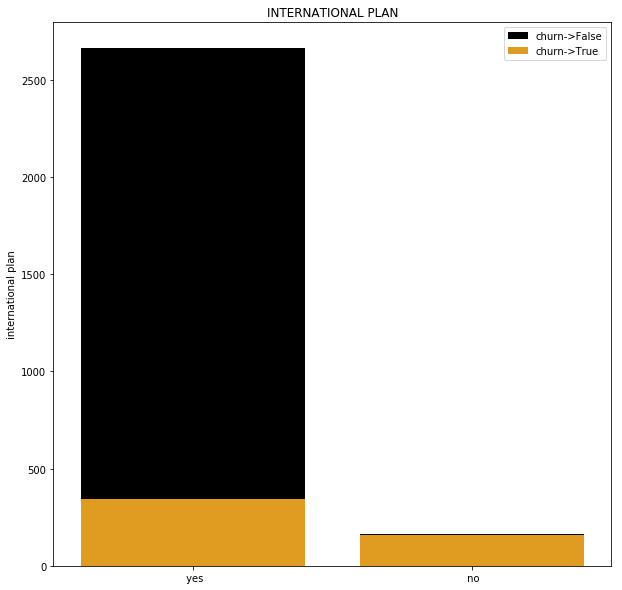

In [96]:
plt.figure(figsize = (10,10))
a = df[df['Churn Indicator'] == ' True.']
b = df[df['Churn Indicator'] == ' False.']

sns.barplot(x = b['international plan'].unique(),y = b['international plan'].value_counts(),
                color="black" ,label = 'churn->False')
sns.barplot(x = a['international plan'].unique(),y = a['international plan'].value_counts(),
                color="orange",label = 'churn->True')
plt.legend()
plt.title('INTERNATIONAL PLAN')
plt.show()

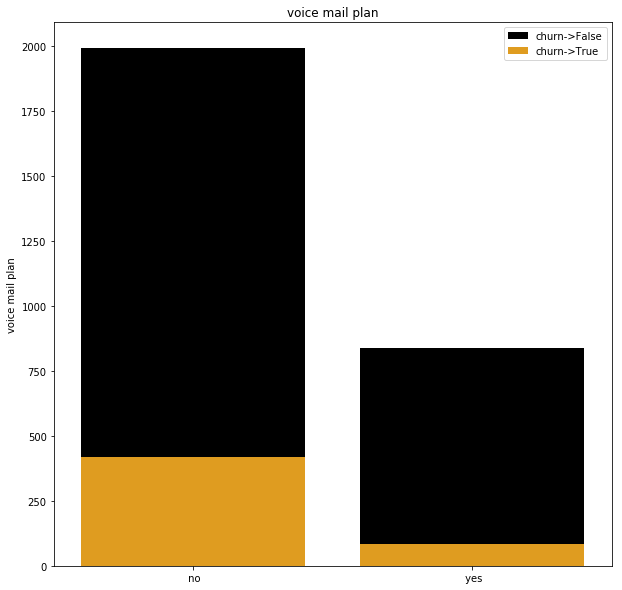

In [97]:
plt.figure(figsize = (10,10))
a = df[df['Churn Indicator'] == ' True.']
b = df[df['Churn Indicator'] == ' False.']

sns.barplot(x = b['voice mail plan'].unique(),y = b['voice mail plan'].value_counts(),
                color="black" ,label = 'churn->False')
sns.barplot(x = a['voice mail plan'].unique(),y = a['voice mail plan'].value_counts(),
                color="orange",label = 'churn->True')
plt.legend()
plt.title('voice mail plan')
plt.show()

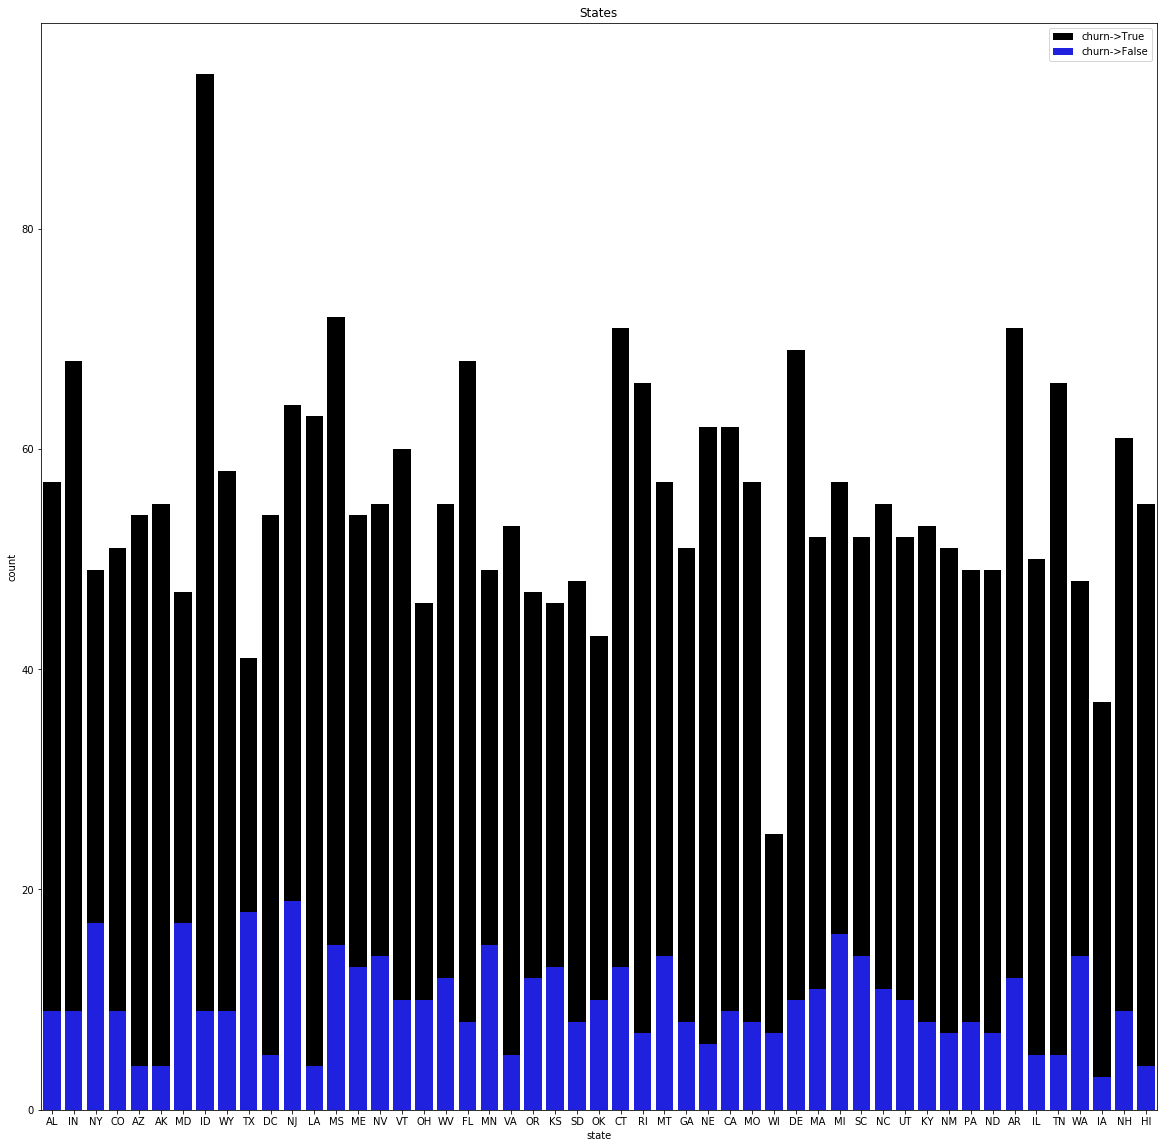

In [98]:
plt.figure(figsize = (20,20))
a = df[df['Churn Indicator'] == ' True.']
b = df[df['Churn Indicator'] == ' False.']
sns.countplot(b['state'],color = 'black',label = 'churn->True')
sns.countplot(a['state'],color = 'blue',label = 'churn->False')
plt.legend()
plt.title('States')
plt.show()


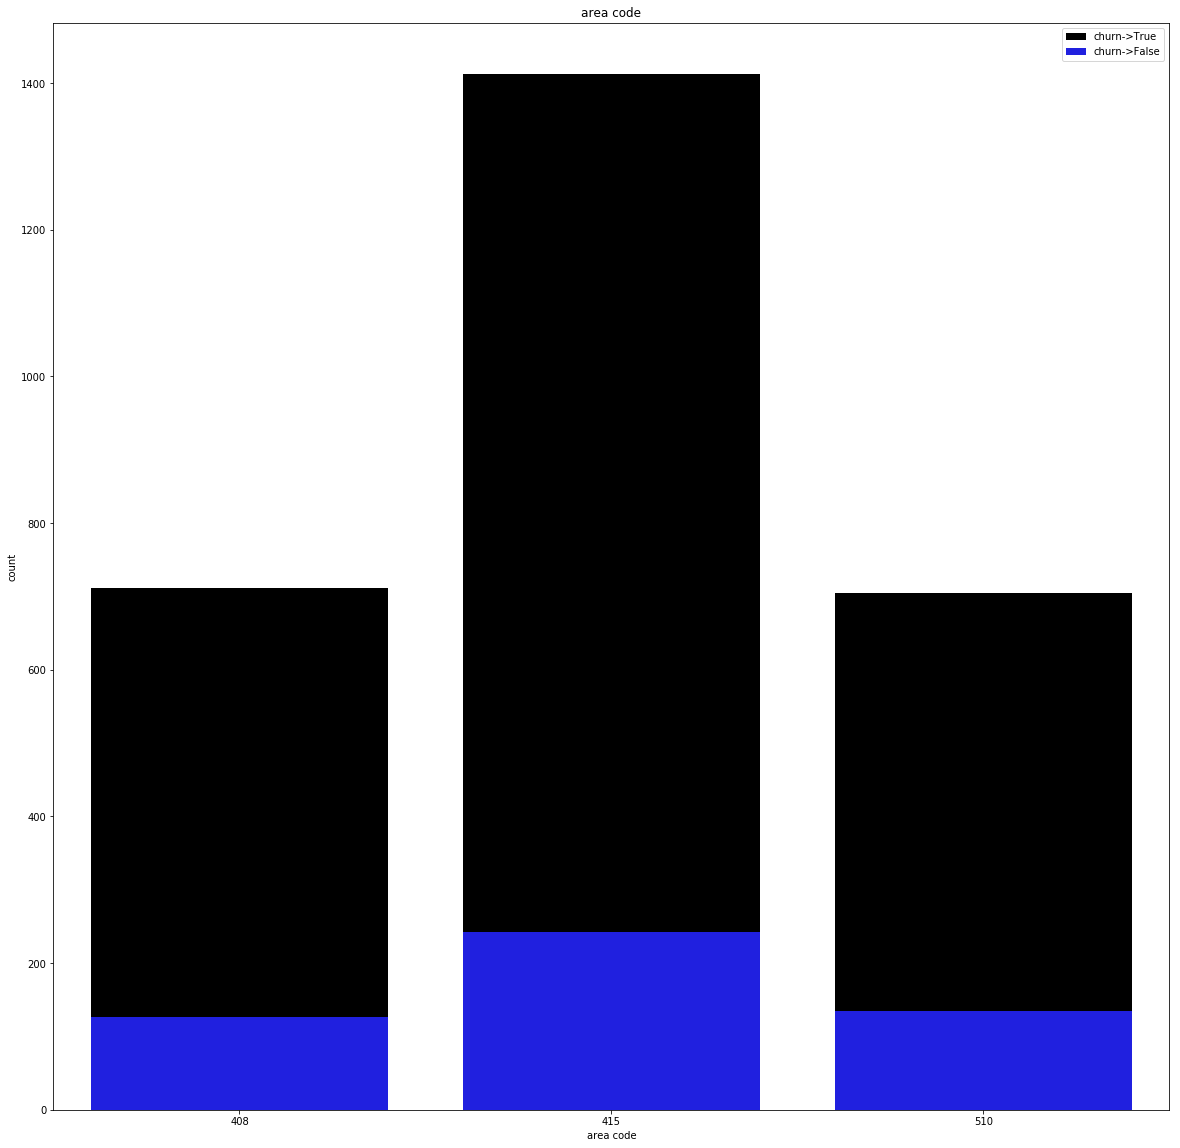

In [99]:
plt.figure(figsize = (20,20))
a = df[df['Churn Indicator'] == ' True.']
b = df[df['Churn Indicator'] == ' False.']
sns.countplot(b['area code'],color = 'black',label = 'churn->True')
sns.countplot(a['area code'],color = 'blue',label = 'churn->False')
plt.legend()
plt.title('area code')
plt.show()


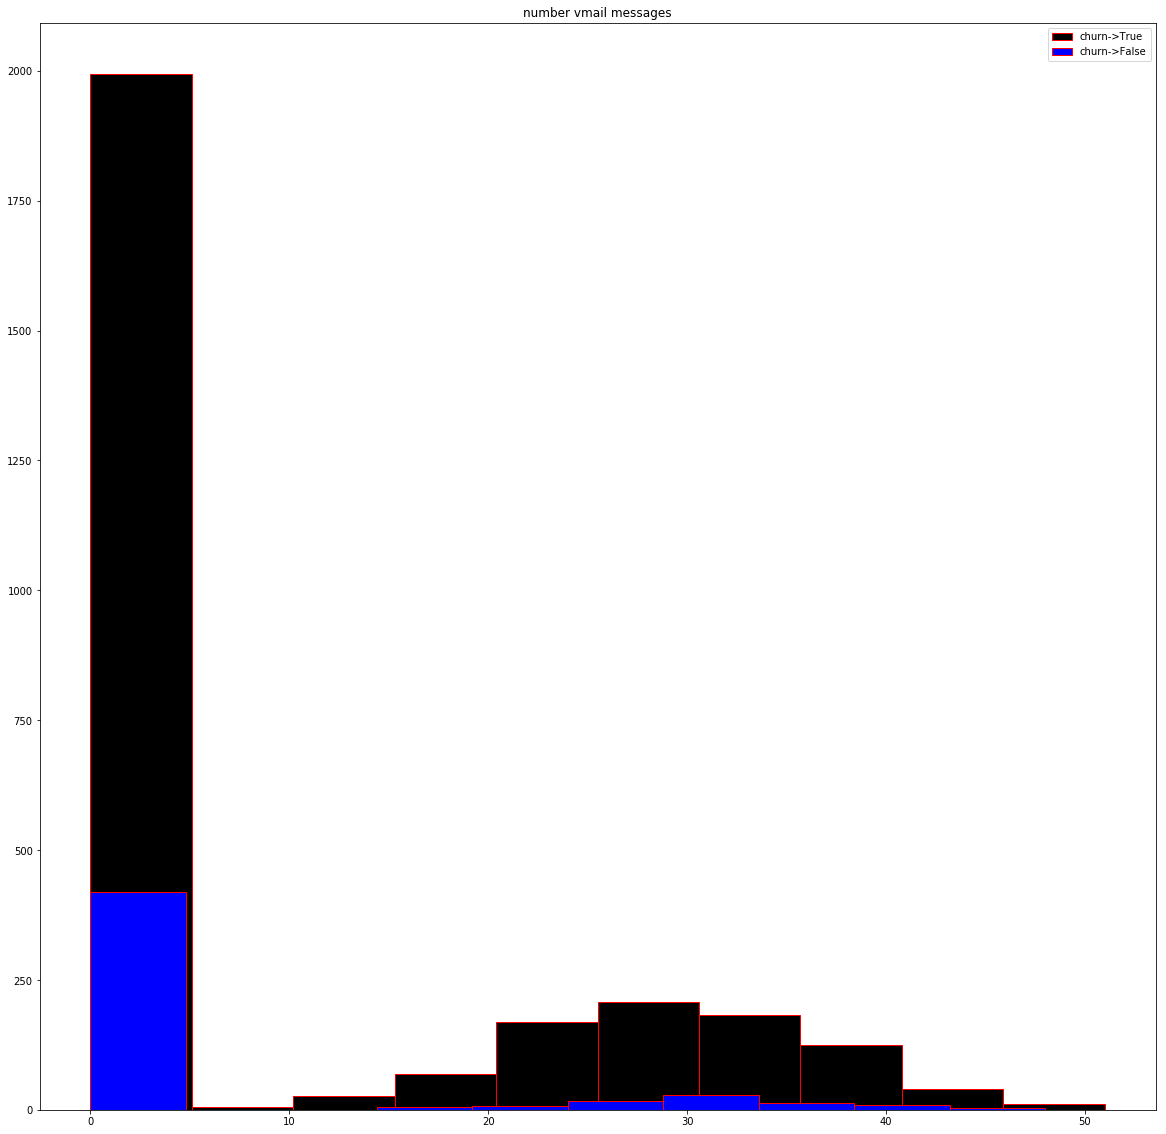

In [100]:
plt.figure(figsize = (20,20))
a = df[df['Churn Indicator'] == ' True.']
b = df[df['Churn Indicator'] == ' False.']
plt.hist(b['number vmail messages'],bins = 10,color = 'black',edgecolor = 'red',label = 'churn->True')
plt.hist(a['number vmail messages'],bins = 10,color = 'blue',edgecolor = 'red',label = 'churn->False')
plt.legend()
plt.title('number vmail messages')
plt.show()

In [101]:
df.drop(['voice mail plan','state','international plan','phone number'],axis = 1,inplace = True)

In [102]:
df_true = df[df['Churn Indicator'] == ' True.']
df_false = df[df['Churn Indicator'] == ' False.']
df_true.drop('Churn Indicator',axis = 1,inplace = True)
df_false.drop('Churn Indicator',axis = 1,inplace = True)

C:\Users\yasht\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [103]:
columns = df_true.columns

In [104]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_true = scaler.fit_transform(df_true)
df_false = scaler.fit_transform(df_false)
'''

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\ndf_true = scaler.fit_transform(df_true)\ndf_false = scaler.fit_transform(df_false)\n'

In [105]:
#df_true = pd.DataFrame(df_true,columns = columns)
#df_false = pd.DataFrame(df_false,columns = columns)

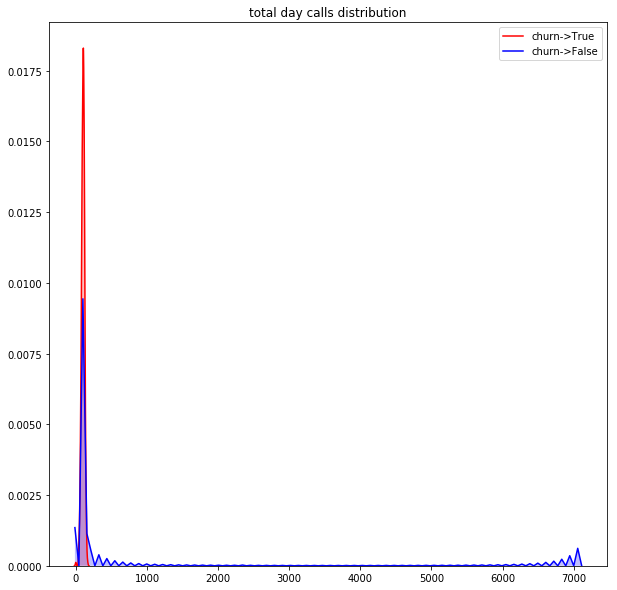

In [106]:
plt.figure(figsize = (10,10))
sns.kdeplot(df_true['total day calls'],shade =True,color = 'red',label = 'churn->True')
sns.kdeplot(df_false['total day calls'],shade =True,color = 'blue',label = 'churn->False')
plt.legend()
plt.title('total day calls distribution')
plt.show()

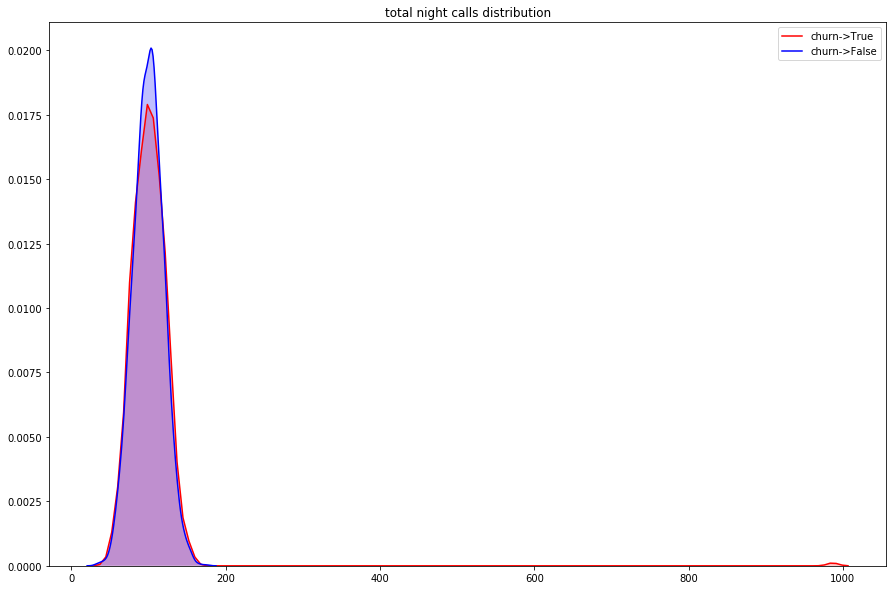

In [107]:
plt.figure(figsize = (15,10))
sns.kdeplot(df_true['total night calls'],shade =True,color = 'red',label = 'churn->True')
sns.kdeplot(df_false['total night calls'],shade =True,color = 'blue',label = 'churn->False')
plt.legend()
plt.title('total night calls distribution')
plt.show()

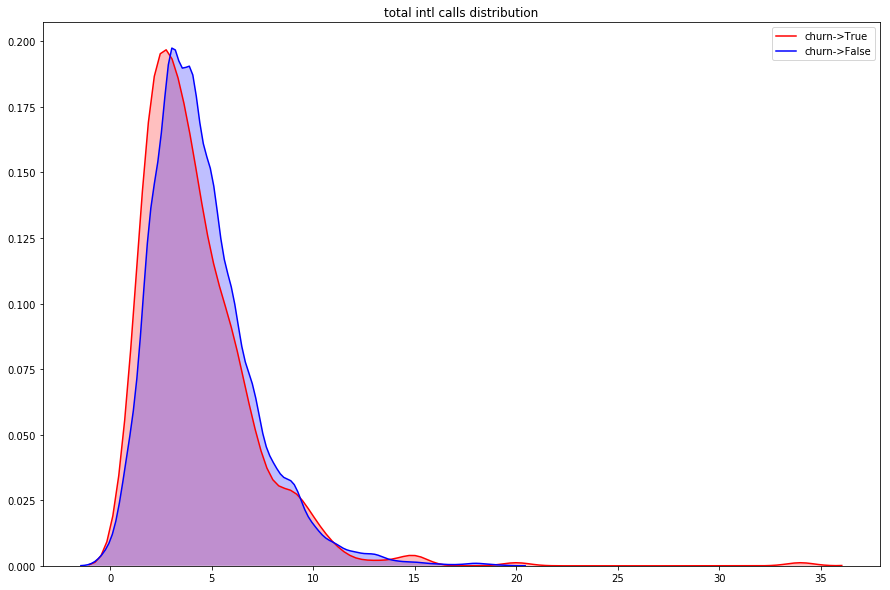

In [108]:
plt.figure(figsize = (15,10))
sns.kdeplot(df_true['total intl calls'],shade =True,color = 'red',label = 'churn->True')
sns.kdeplot(df_false['total intl calls'],shade =True,color = 'blue',label = 'churn->False')
plt.legend()
plt.title('total intl calls distribution')
plt.show()


conclusion
1 if international plan is no than ratio of churn to not churn is more ie. prospect will be probably churn if he did not have international plan in compare to if international plan is yes
2 states Id, Ar and Tn have high rates of customer churn
3 area code 415 is the area with high churn rate point focus on this
